In [14]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import utils #the Berkely Data Science Lab common utilities file
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

In [1]:
#metadata shows the download size is about 1.95gb


data_dir = 'data'
data_url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i'

file_name = 'NYPD_Complaint_Data_Historic.csv'


dest_path = utils.fetch_and_cache(data_url=data_url, file=file_name,data_dir=data_dir)

In [20]:
#check the size of the file
import os
statinfo=os.path.getsize(dest_path)
statinfo


2094930997

In [19]:
#get the number of the lines in the file
from utils import line_count
line_count(dest_path)

6500871

In [40]:
from utils import head
head('data/NYPD_Complaint_Data_Historic.csv')

['ï»¿CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX\n',
 '577055921,12/31/2018,19:00:00,12/31/2018,19:35:00,75,12/31/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2,,EAST NEW YORK CITY LINE,348,"1,019,655","182,468",<18,BLACK,F,,40.66744666500005,-73.87237725799997,"(40.667446665, -73.872377258)",PATROL BORO BKLYN NORTH,,18-24,BLACK,M\n',
 '311304275,12/31/2018,15:00:00,12/31/2018,16:00:00,41,12/31/2018,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,COMPLETED,MISDEMEANOR,BRONX,INSIDE,STREET,N.Y. POLICE DEPT,0,,,,"1,015,845","236,500",25-4

In [48]:
#split the file into several smaller files since it is large
import sys
csvfilename = open(dest_path, 'r').readlines()
lines_per_file = int(line_count(dest_path)/10)  
index = 0    
for line in range(len(csvfilename)):
    if (line % lines_per_file == 0):
        index+=1
        open(str(dest_path)+ "_" + str(index) + '.csv', 'w+').\
        writelines(csvfilename[line:line+lines_per_file])
   



In [49]:
from pathlib import Path
data_dir_path = Path('data')
file_names = [x.name for x in data_dir_path.glob('*') if x.is_file()]
file_names

['NYPD_Complaint_Data_Historic.csv',
 'NYPD_Complaint_Data_Historic.csv_1.csv',
 'NYPD_Complaint_Data_Historic.csv_10.csv',
 'NYPD_Complaint_Data_Historic.csv_11.csv',
 'NYPD_Complaint_Data_Historic.csv_2.csv',
 'NYPD_Complaint_Data_Historic.csv_3.csv',
 'NYPD_Complaint_Data_Historic.csv_4.csv',
 'NYPD_Complaint_Data_Historic.csv_5.csv',
 'NYPD_Complaint_Data_Historic.csv_6.csv',
 'NYPD_Complaint_Data_Historic.csv_7.csv',
 'NYPD_Complaint_Data_Historic.csv_8.csv',
 'NYPD_Complaint_Data_Historic.csv_9.csv']

In [252]:
#work with one of the smaller files and load it into a dataframe
import pandas as pd
import time

#time how long it takes to load the smaller file into a dataframe
start=time.process_time()
calls = pd.read_csv("data/NYPD_Complaint_Data_Historic.csv_1.csv")
stop=time.process_time()
runTime=stop-start
runTime
#calls.head()


5.015625

In [54]:
calls.info()
calls.describe()


#The columns PARKS_NM, HADEVELOPT, HOUSING_PSA, TRANSIT_DISTRICT should be removed because 
#they are missing more than 50% of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650086 entries, 0 to 650085
Data columns (total 35 columns):
CMPLNT_NUM           650086 non-null int64
CMPLNT_FR_DT         650086 non-null object
CMPLNT_FR_TM         650086 non-null object
CMPLNT_TO_DT         556899 non-null object
CMPLNT_TO_TM         557243 non-null object
ADDR_PCT_CD          650083 non-null float64
RPT_DT               650086 non-null object
KY_CD                650086 non-null int64
OFNS_DESC            650078 non-null object
PD_CD                649685 non-null float64
PD_DESC              649685 non-null object
CRM_ATPT_CPTD_CD     650086 non-null object
LAW_CAT_CD           650086 non-null object
BORO_NM              649680 non-null object
LOC_OF_OCCUR_DESC    528543 non-null object
PREM_TYP_DESC        647403 non-null object
JURIS_DESC           650086 non-null object
JURISDICTION_CODE    649685 non-null float64
PARKS_NM             5807 non-null object
HADEVELOPT           31664 non-null object
HOUSING_PSA

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,TRANSIT_DISTRICT,Latitude,Longitude
count,6.500860e+05,650083.000000,650086.000000,649685.000000,649685.000000,16683.000000,650037.000000,650037.000000
mean,5.502522e+08,62.685948,305.124376,405.605441,0.986586,13.116766,40.736159,-73.925932
std,2.596700e+08,34.559920,154.470929,218.273654,8.449202,12.376484,0.083201,0.076716
min,1.000001e+08,1.000000,101.000000,101.000000,0.000000,1.000000,40.499025,-74.254377
25%,3.252961e+08,40.000000,118.000000,254.000000,0.000000,3.000000,40.673622,-73.973832
50%,5.503958e+08,62.000000,341.000000,343.000000,0.000000,4.000000,40.734119,-73.927968
75%,7.752070e+08,90.000000,351.000000,638.000000,0.000000,30.000000,40.812153,-73.883722
max,9.999956e+08,123.000000,678.000000,922.000000,97.000000,34.000000,40.912723,-73.700568


In [55]:
calls.nunique()

#There are 76913 distinct latitude,longitude locations.
#There are 54 different age groups for victims and there are 40 different age groups for suspects represented.
#There are 5 boroughs included.
#There are 61 offense types.

CMPLNT_NUM           650041
CMPLNT_FR_DT            518
CMPLNT_FR_TM           1440
CMPLNT_TO_DT            522
CMPLNT_TO_TM           1440
ADDR_PCT_CD              77
RPT_DT                  518
KY_CD                    66
OFNS_DESC                61
PD_CD                   360
PD_DESC                 350
CRM_ATPT_CPTD_CD          2
LAW_CAT_CD                3
BORO_NM                   5
LOC_OF_OCCUR_DESC         5
PREM_TYP_DESC            72
JURIS_DESC               19
JURISDICTION_CODE        19
PARKS_NM                741
HADEVELOPT              264
HOUSING_PSA             477
X_COORD_CD            52198
Y_COORD_CD            55454
SUSP_AGE_GROUP           40
SUSP_RACE                 7
SUSP_SEX                  3
TRANSIT_DISTRICT         12
Latitude             119316
Longitude            117219
Lat_Lon               76913
PATROL_BORO               8
STATION_NAME            367
VIC_AGE_GROUP            54
VIC_RACE                  7
VIC_SEX                   5
dtype: int64

In [10]:
#examine the counts of offenses in each borough
calls_by_Boro_and_offense=calls.groupby('BORO_NM').OFNS_DESC.value_counts()
calls_by_Boro_and_offense
#calls.groupby(["BORO_NM"]).head()

BORO_NM        OFNS_DESC                           
BRONX          HARRASSMENT 2                           22597
               PETIT LARCENY                           21929
               ASSAULT 3 & RELATED OFFENSES            19842
               CRIMINAL MISCHIEF & RELATED OF          14724
               GRAND LARCENY                            8892
               DANGEROUS DRUGS                          8319
               FELONY ASSAULT                           8063
               OFF. AGNST PUB ORD SENSBLTY &            6409
               ROBBERY                                  4758
               OFFENSES AGAINST PUBLIC ADMINI           3665
               BURGLARY                                 3242
               DANGEROUS WEAPONS                        3099
               MISCELLANEOUS PENAL LAW                  2689
               VEHICLE AND TRAFFIC LAWS                 2309
               GRAND LARCENY OF MOTOR VEHICLE           1865
               SEX CRIMES        

In [76]:
#examine the offenses committed in the bronx
list=[]
#calls_by_Boro_and_offense["BRONX"].index
size=len(calls_by_Boro_and_offense["BRONX"])
for x in range(size):
    list.append(calls_by_Boro_and_offense["BRONX"].index[x])

list.sort()
list

#142156 offenses were comitted in Bronx.

['ABORTION',
 'ADMINISTRATIVE CODE',
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
 'ALCOHOLIC BEVERAGE CONTROL LAW',
 'ANTICIPATORY OFFENSES',
 'ARSON',
 'ASSAULT 3 & RELATED OFFENSES',
 "BURGLAR'S TOOLS",
 'BURGLARY',
 'CHILD ABANDONMENT/NON SUPPORT',
 'CRIMINAL MISCHIEF & RELATED OF',
 'CRIMINAL TRESPASS',
 'DANGEROUS DRUGS',
 'DANGEROUS WEAPONS',
 'DISORDERLY CONDUCT',
 'ENDAN WELFARE INCOMP',
 'ESCAPE 3',
 'FELONY ASSAULT',
 'FORGERY',
 'FRAUDS',
 'FRAUDULENT ACCOSTING',
 'GAMBLING',
 'GRAND LARCENY',
 'GRAND LARCENY OF MOTOR VEHICLE',
 'HARRASSMENT 2',
 'HOMICIDE-NEGLIGENT,UNCLASSIFIE',
 'INTOXICATED & IMPAIRED DRIVING',
 'INTOXICATED/IMPAIRED DRIVING',
 'JOSTLING',
 'KIDNAPPING',
 'KIDNAPPING & RELATED OFFENSES',
 'MISCELLANEOUS PENAL LAW',
 'NYS LAWS-UNCLASSIFIED FELONY',
 'NYS LAWS-UNCLASSIFIED VIOLATION',
 'OFF. AGNST PUB ORD SENSBLTY &',
 'OFFENSES AGAINST PUBLIC ADMINI',
 'OFFENSES AGAINST PUBLIC SAFETY',
 'OFFENSES AGAINST THE PERSON',
 'OFFENSES INVOLVING FRAUD',
 'OFFENSES RE

In [61]:
#check the top 5 most common crimes in the bronx
calls_by_Boro_and_offense["BRONX"].head(5)
mostCommon=[calls_by_Boro_and_offense["BRONX"].index[0],calls_by_Boro_and_offense["BRONX"].index[1],calls_by_Boro_and_offense["BRONX"].index[2],calls_by_Boro_and_offense["BRONX"].index[3],calls_by_Boro_and_offense["BRONX"].index[4]]
mostCommon

['HARRASSMENT 2',
 'PETIT LARCENY',
 'ASSAULT 3 & RELATED OFFENSES',
 'CRIMINAL MISCHIEF & RELATED OF',
 'GRAND LARCENY']

In [103]:
#probability of a particular crime happening in the bronx
crime="ARSON"
prob=(calls_by_Boro_and_offense["BRONX"].to_frame().loc[crime].sum())/calls_by_Boro_and_offense["BRONX"].sum()

prob

#calls_by_Boro_and_offense["BRONX"].iloc[28]

0.002061115957117533

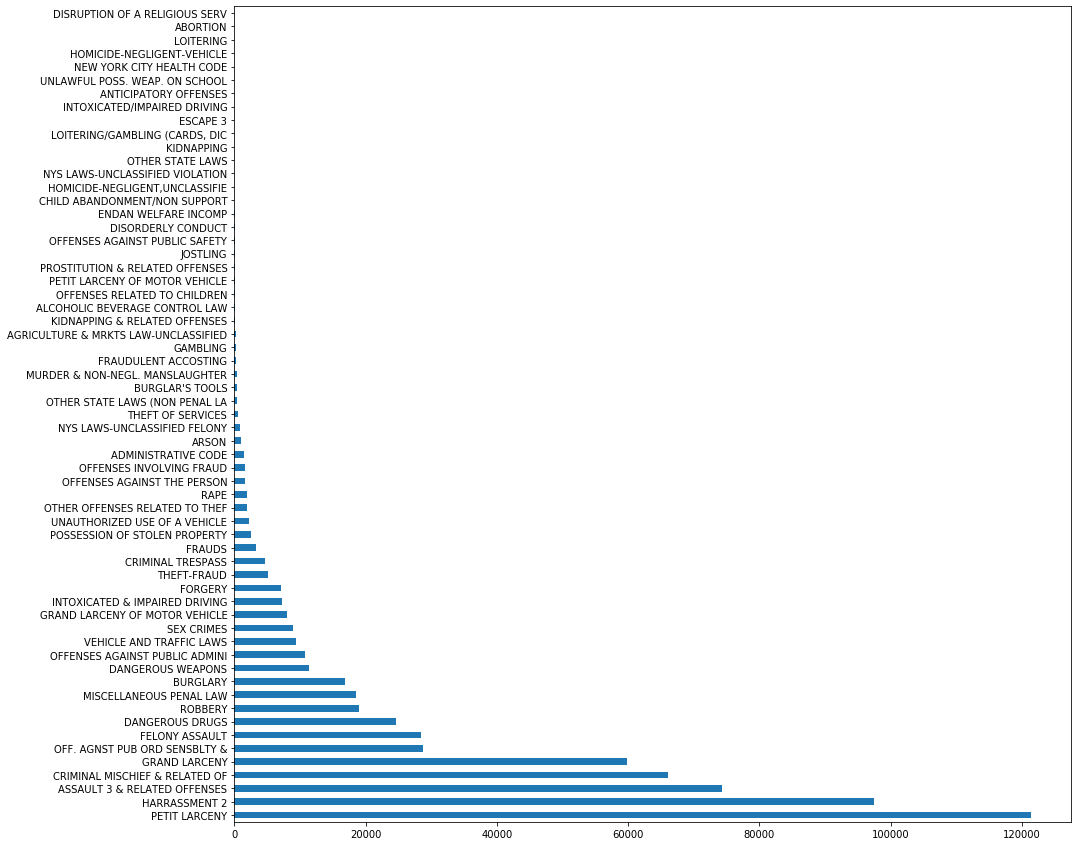

In [24]:
#plot the value counts of each offense in NYC
plt.figure(figsize=(15,15))
offenses=calls.OFNS_DESC.value_counts()
myplot=offenses.plot(kind="barh")

<Figure size 1080x1080 with 0 Axes>

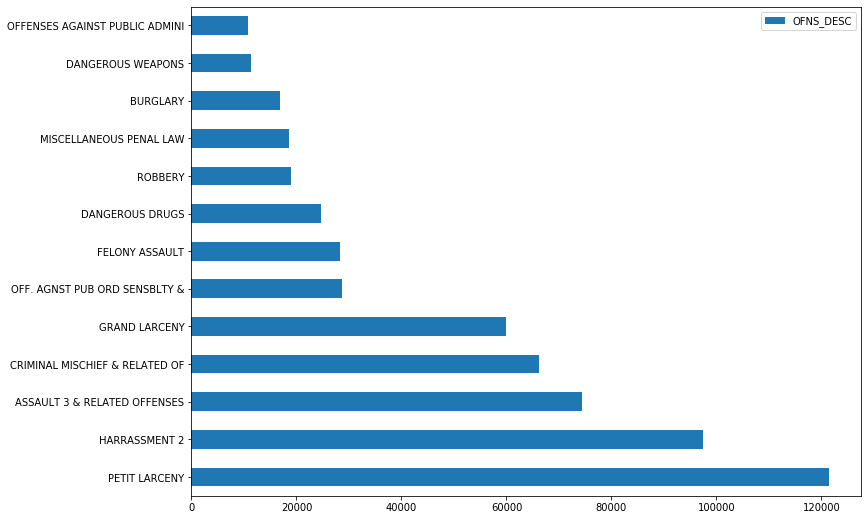

In [29]:
#drop offenses with count lower than 10k
plt.figure(figsize=(15,15))
offenses2=offenses.to_frame()[offenses.to_frame()["OFNS_DESC"]>10000]
myplot=offenses2.plot(kind="barh")

Text(0.5, 1.0, 'Number of Calls By Crime Type')

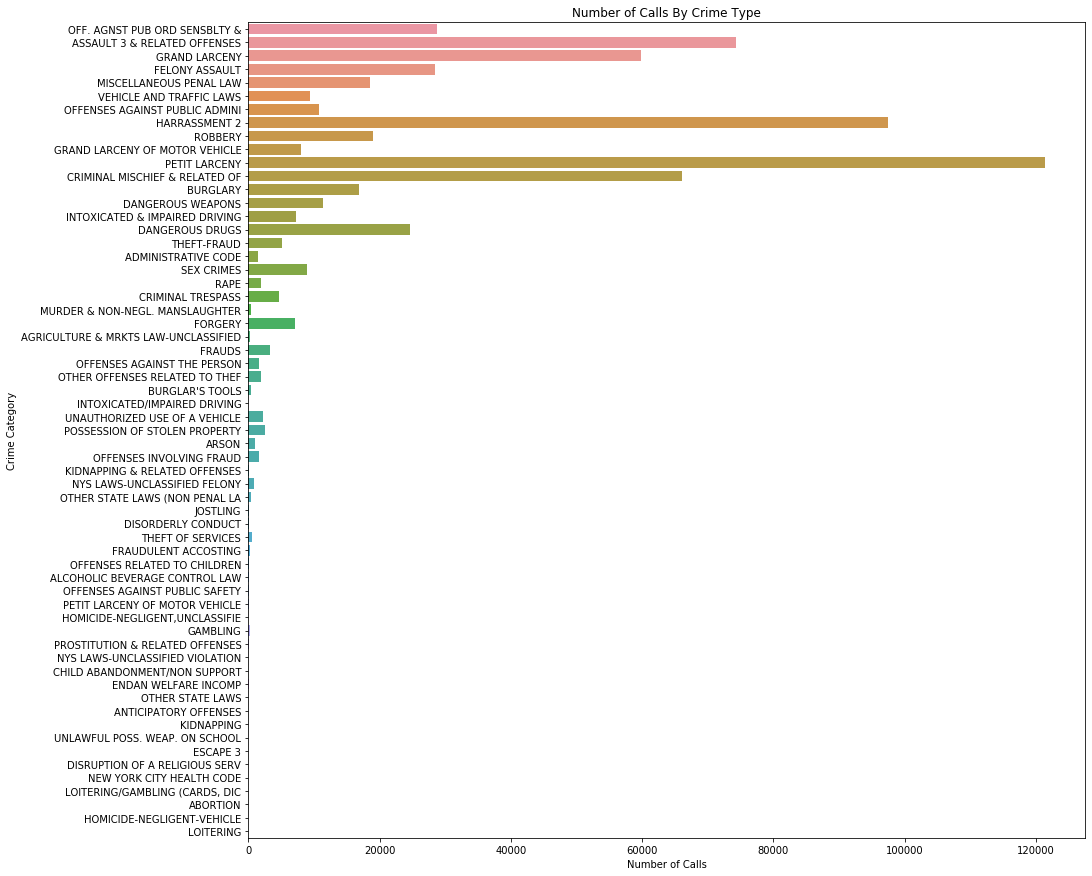

In [39]:
#using seaborn to plot the counts
plt.figure(figsize=(15,15))
ax = sns.countplot(data=calls, y="OFNS_DESC")
ax.set_ylabel("Crime Category")
ax.set_xlabel("Number of Calls")
ax.set_title("Number of Calls By Crime Type")


Text(0.5, 1.0, 'Number of Calls By Crime Type')

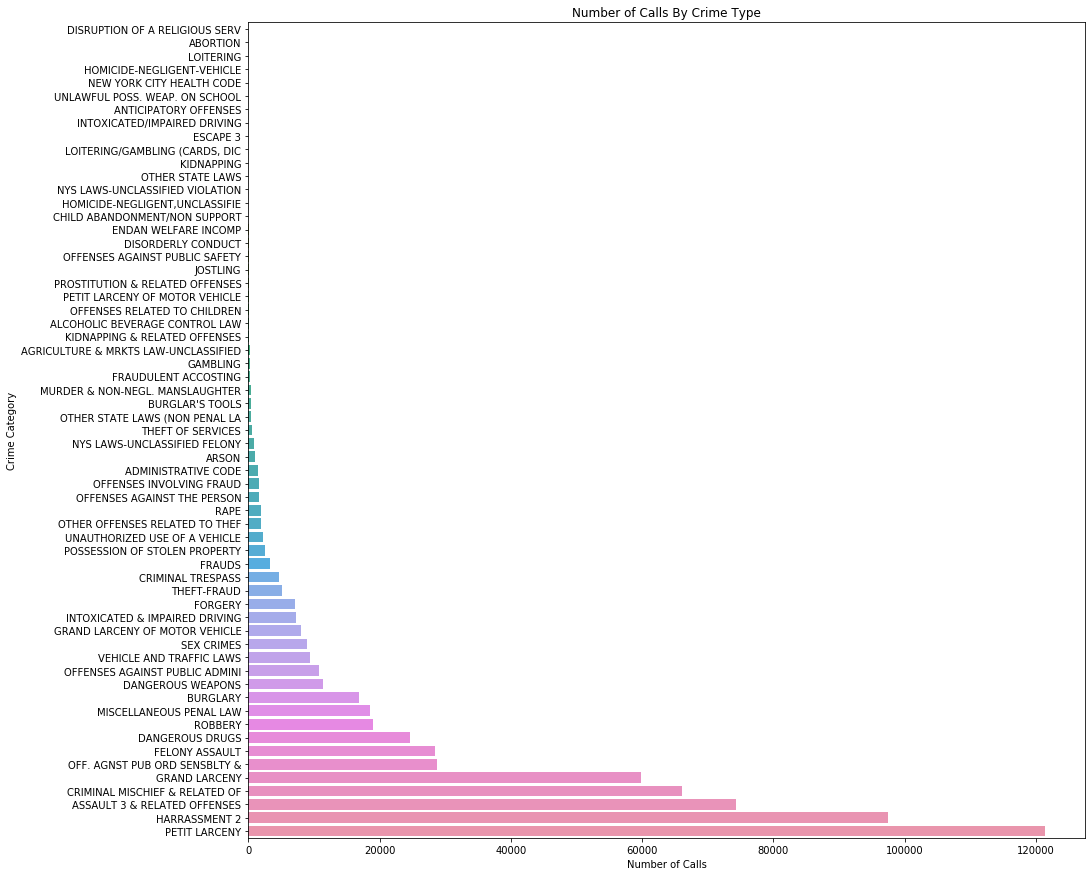

In [38]:
#sorted counts with seaborn
plt.figure(figsize=(15,15))
ax = sns.countplot(data=calls, y="OFNS_DESC",order=calls["OFNS_DESC"].value_counts(ascending=True).index)
ax.set_ylabel("Crime Category")
ax.set_xlabel("Number of Calls")
ax.set_title("Number of Calls By Crime Type")

In [253]:
#add a day of week field computed from the CMPLNT_FR_DT column
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

import datetime

def getWeekday(day):
    STRING=day
    month, day, year = (int(x) for x in STRING.split('/'))    
    day = datetime.datetime(year, month, day)
    #print(day.weekday())
    return day.weekday()
calls['DAY_OF_WEEK'] = calls.CMPLNT_FR_DT.apply(lambda x: getWeekday(x))

calls['DAY_OF_WEEK']=calls['DAY_OF_WEEK'].map({6: "Sunday", 0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday"})
#calls


Text(0.5, 1.0, 'Number of Calls by Day of Week')

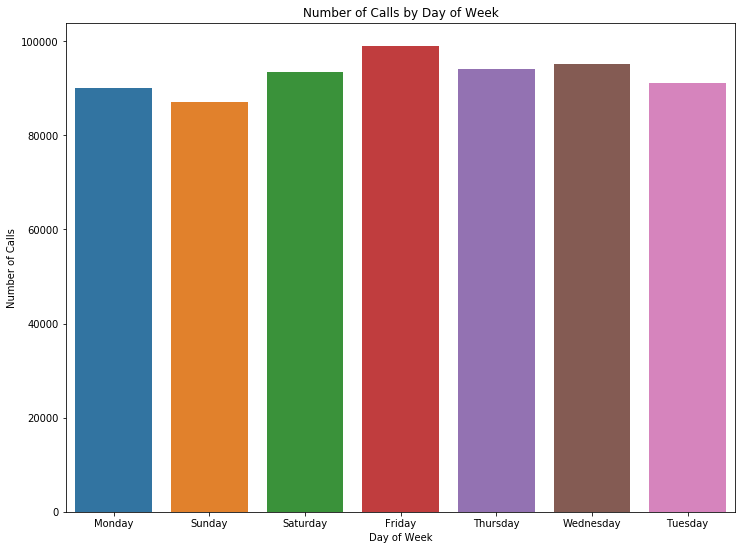

In [228]:
#plot calls by day of week with seaborn
ax = sns.countplot(data=calls, x="DAY_OF_WEEK")
ax.set_ylabel("Number of Calls")
ax.set_xlabel("Day of Week")
ax.set_title("Number of Calls by Day of Week")


Text(0.5, 1.0, 'Number of Calls by Day of Week')

<Figure size 1080x1080 with 0 Axes>

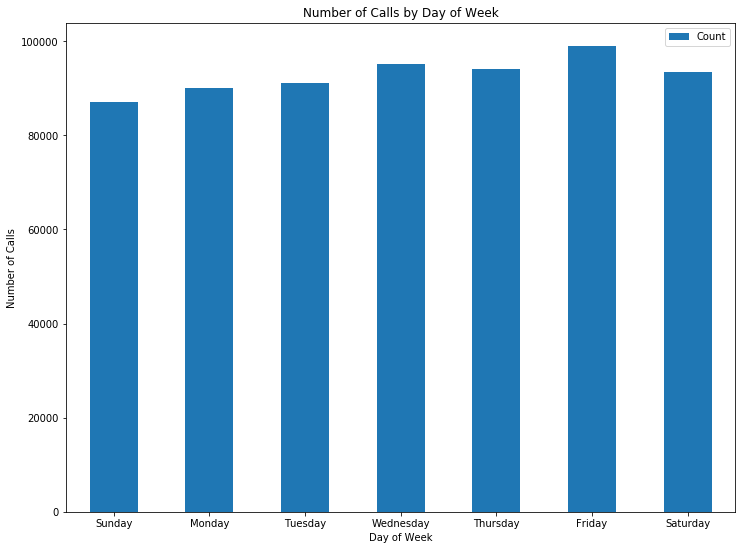

In [238]:
#plot the calls by day of week with pandas


plotting=pd.DataFrame([["Sunday", 87025], ["Monday",90069], ["Tuesday",91096], 
                        ["Wednesday",95235],  ["Thursday",94163], ["Friday",98987], ["Saturday",93503]],columns=["Day","Count"], index=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plotting
plt.figure(figsize=(15,15))

myplot=plotting.plot(kind="bar")
#myplot.ticklabels(myplot.get_xticklabels(),rotation=90)
plt.xticks(rotation='horizontal')
myplot.set_ylabel("Number of Calls")
myplot.set_xlabel("Day of Week")
myplot.set_title("Number of Calls by Day of Week")

Text(0.5, 1.0, 'Number of Calls by Day of Week for HARRASSMENT 2')

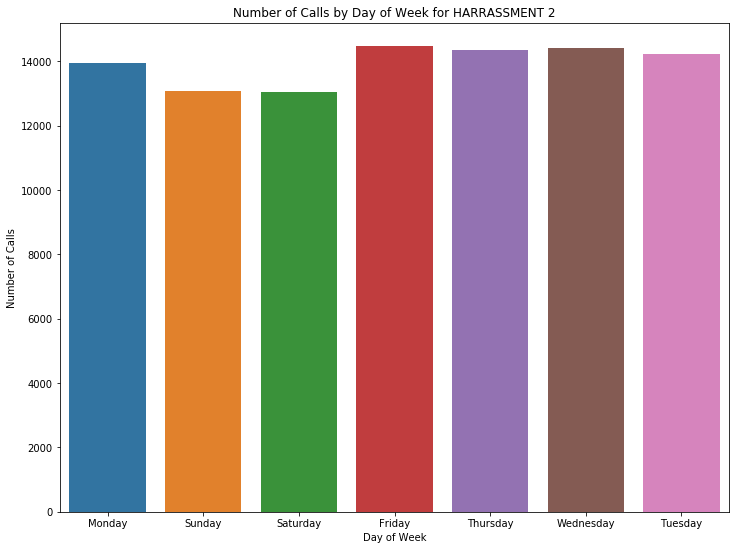

In [265]:
#plot calls by day of week for harrassment 2

#get the data frame that has only the harrassment 2 calls
temp=calls.copy()
temp=temp[temp["OFNS_DESC"]=="HARRASSMENT 2"]


ax = sns.countplot(data=temp, x="DAY_OF_WEEK")
ax.set_ylabel("Number of Calls")
ax.set_xlabel("Day of Week")
ax.set_title("Number of Calls by Day of Week for HARRASSMENT 2")
#calls


#calls seem consistent throughout the weekdays but drop for the weekend.

Text(0.5, 1.0, 'Number of Calls by Day of Week for BURGLARY')

<Figure size 1080x1080 with 0 Axes>

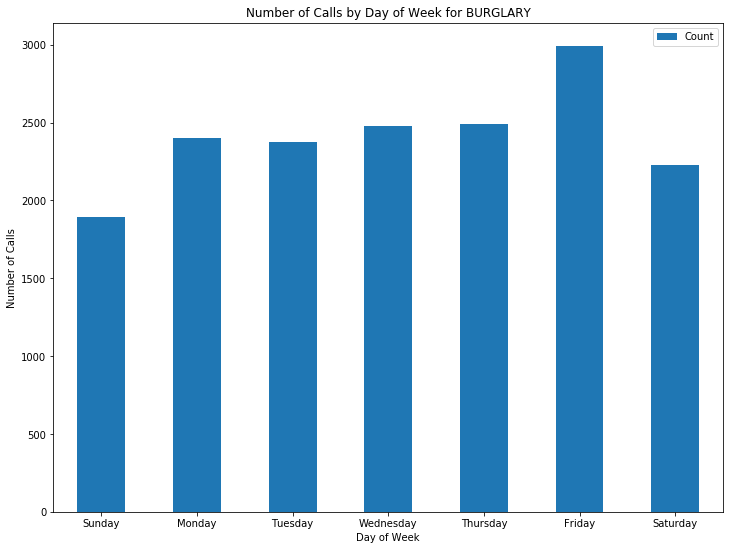

In [266]:
#plot calls by day of week for burglary

plotting=pd.DataFrame([["Sunday", 1892], ["Monday",2401], ["Tuesday",2375], 
                        ["Wednesday",2476],  ["Thursday",2492], ["Friday",2993], ["Saturday",2228]],columns=["Day","Count"], index=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plotting
plt.figure(figsize=(15,15))

myplot=plotting.plot(kind="bar")
#myplot.ticklabels(myplot.get_xticklabels(),rotation=90)
plt.xticks(rotation='horizontal')
myplot.set_ylabel("Number of Calls")
myplot.set_xlabel("Day of Week")
myplot.set_title("Number of Calls by Day of Week for BURGLARY")




Text(0.5, 1.0, 'Number of Calls by Hour')

<Figure size 1080x1080 with 0 Axes>

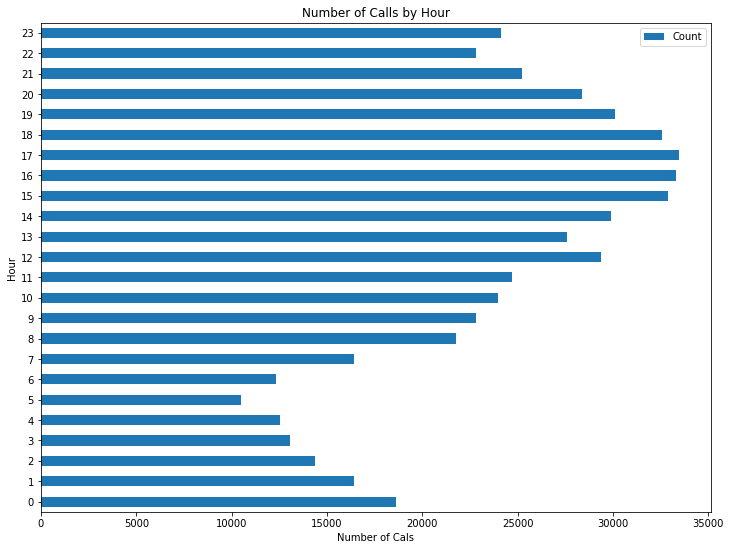

In [343]:
#add a hour of day field computed from the CMPLNT_TO_TM column

calls['Hour']=calls["CMPLNT_TO_TM"]
calls['Hour']= calls['Hour'].str.slice(0,2)
#calls['Hour']=calls.Hour.apply(lambda x: makeInt(x))
calls['Hour']=calls.Hour.apply(lambda x: int(x) if np.isnan(float(x))== False else x)

#get the counts
temp=calls.groupby("Hour").OFNS_DESC.value_counts().sort_index()
#print(temp)
temp=temp.to_frame().groupby("Hour").sum()
#temp


#plot calls by hour of day using the value counts
plotting=pd.DataFrame([["00", 18632], ["01",16424], 
                       ["02",14389], ["03",13041], 
                       ["04",12514] , ["05",10509], 
                       ["06",12308], ["07",16419], 
                       ["08",21794], ["09",22819],
                       ["10",23978] , ["11",24730], 
                       ["12",29379], ["13",27585] ,
                       ["14",29886] ,["15",32880], 
                       ["16",33310], ["17",33451], 
                       ["18",32564], ["19",30095], 
                       ["20",28366], ["21",25221], 
                       ["22",22795],["23",24147]],
                      columns=["Hour","Count"])
plotting
plt.figure(figsize=(15,15))

myplot=plotting.plot(kind="barh")
#myplot.ticklabels(myplot.get_xticklabels(),rotation=90)
plt.xticks(rotation='horizontal')
myplot.set_ylabel("Hour")
myplot.set_xlabel("Number of Cals")
myplot.set_title("Number of Calls by Hour")


#calls



<Figure size 1080x1080 with 0 Axes>

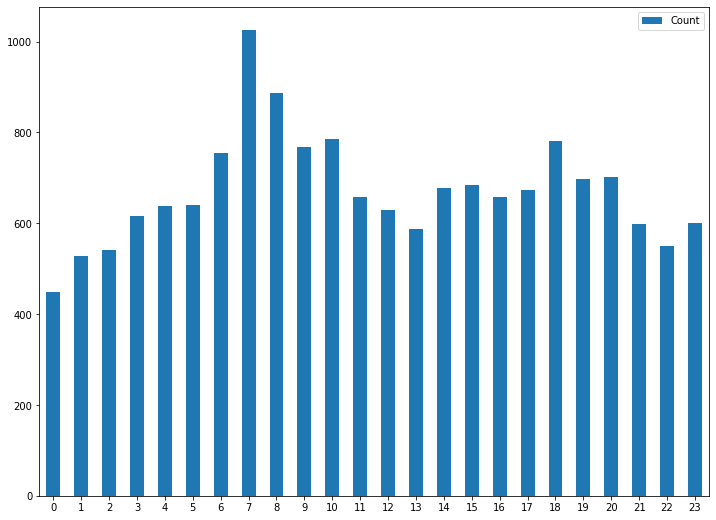

In [344]:
#get the value counts for burglary by hour
temp=calls.copy()
temp=temp[temp["OFNS_DESC"]=="BURGLARY"]
temp=temp.groupby("Hour").OFNS_DESC.value_counts().sort_index()
temp


#plot the calls for burglary by hour
plotting=pd.DataFrame([["00", 448], ["01",528], 
                       ["02",541], ["03",617], 
                       ["04",638] , ["05",641], 
                       ["06",754], ["07",1026], 
                       ["08",886], ["09",769],
                       ["10",786] , ["11",657], 
                       ["12",630], ["13",588] ,
                       ["14",678] ,["15",685], 
                       ["16",659], ["17",673], 
                       ["18",782], ["19",697], 
                       ["20",702], ["21",598], 
                       ["22",549],["23",601]],
                      columns=["Hour","Count"])
plotting
plt.figure(figsize=(15,15))

myplot=plotting.plot(kind="bar")
#myplot.ticklabels(myplot.get_xticklabels(),rotation=90)
plt.xticks(rotation='horizontal')
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")


#there is a spike in burglary at 7am
#people probably wake up at 7am to find items missing and report it then

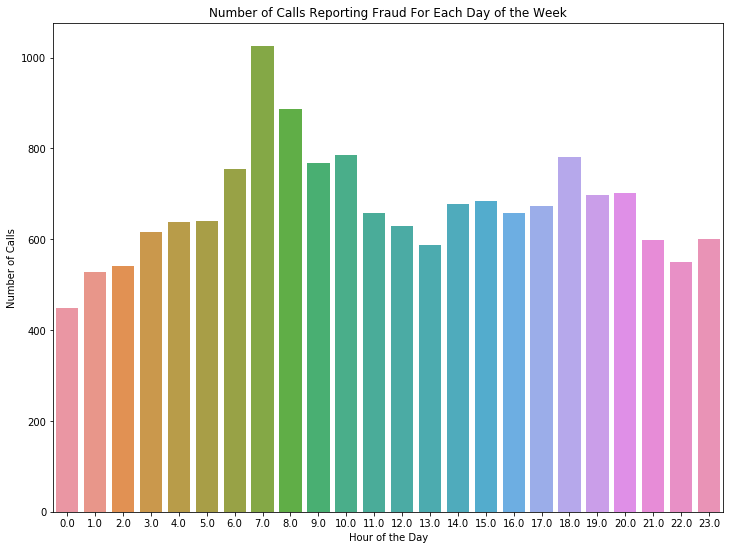

In [345]:
#plot calls reporting fraud for hour of the day
temp=calls.copy()
temp=temp[temp["OFNS_DESC"]=="FRAUDS"]

ax = sns.countplot(data=temp, x="Hour")
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");

#there is also a spike at 7 am for fraud, similar to burglary


<Figure size 1080x1080 with 0 Axes>

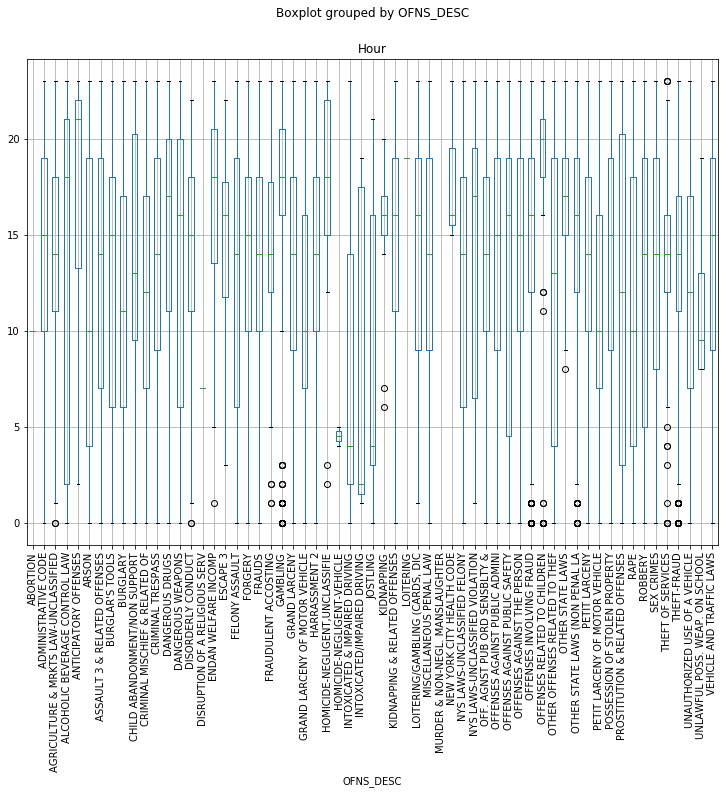

In [346]:
#boxplot of each crime throughout the day
plt.figure(figsize=(15,15))
calls.boxplot(column="Hour", by='OFNS_DESC', rot=90);

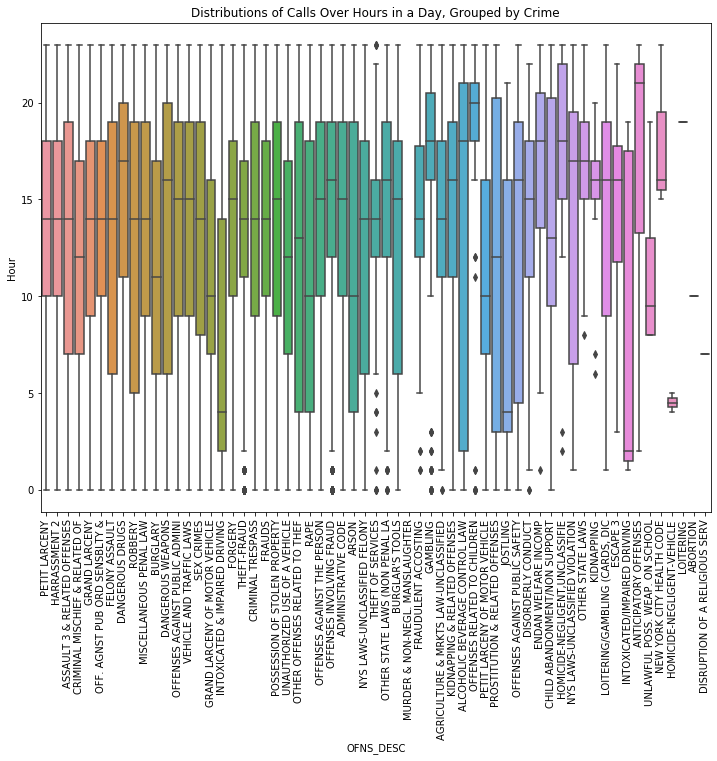

In [353]:
#boxplot with seaborn
ax = sns.boxplot(data=calls, x="OFNS_DESC", y='Hour',order=calls["OFNS_DESC"].value_counts(ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Distributions of Calls Over Hours in a Day, Grouped by Crime");

#ALCOHOL BEVERAGE CONTROL LAW seems to have the largest interquartile range

In [267]:
!pip install --upgrade folium

In [374]:
#use folium to make a burglary heatmap
import folium
from folium import plugins
from folium.plugins import HeatMap

temp=calls.copy()
#get our burglary df
temp=temp[temp["OFNS_DESC"]=="BURGLARY"]



#make the base map
start=folium.Map(location=[40.7128, -74.0060],zoom_start = 13) 
#make the heat map by getting all the lat,long pairs (get all pairs from the data, not a subset)
heat = [[row['Latitude'],row['Longitude']] for index, row in temp.iterrows()]
HeatMap(heat).add_to(start)
start
